

## EDA & Feature Engineering


<p align="center">
  <img src="https://drive.google.com/uc?id=1BjoBAoqfcEobD4zbtWACKkKIDIZ0F4Ny", alt='DS LIFECYCLE', width="70%">
</p>

---

### In conducting EDA(exploratory Data Analysis) we perform analysis on our dataset to find;
- Missing Values
- Relationship between independent & dependent features
- All Numerical & Categorical Features
- Outliers (Boxplot)

### While Feature Engineering Requires us to handle the following within our dataset;
- Handling NAN values
- Handling Outliers
- Handling Numerical & Categorical Features
- Handling Imbalanced Datasets



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


#Displaying all columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading & Identifying the Features available in the dataset
df = pd.read_csv("/content/drive/MyDrive/Hamudat(Project)/Data/video_games_sales.csv",encoding="latin-1")
df.columns
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# getting the complete information about the dataset as regards its numerical features(numerical data)
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 1- Missing Values

Handling missing values within our dataset is essential to identify rows & columns with NaN values, we can also identify the percentage of the NaN value within each feature using a measure of central tendency (MEAN) which essentially gives us the average of the sum.

In [5]:
#identifying features with mising values
missing_values = df.isnull().sum()

# Features with missing values greater than 0(using a list comprehension)
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]

#Find the percentage of Nan are presrnt in the missing columns
for feature in features_with_na:
    print(feature , f" has {np.round(df[feature].isnull().mean()*100,4)}% of missing values")


year  has 1.6327% of missing values
publisher  has 0.3494% of missing values


## 2 - Finding the relationship between the Missing Features and the Ouput variables

Our output variable is "global sales"

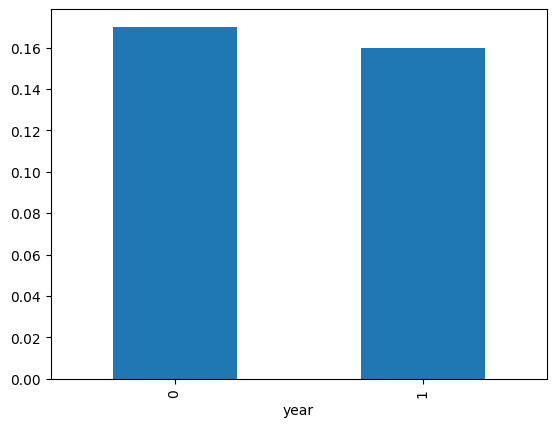

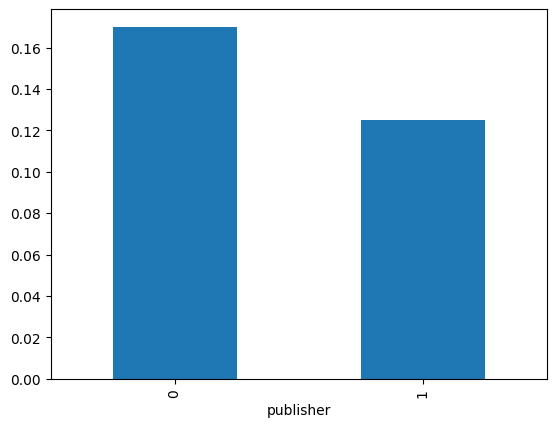

In [6]:
data = df.copy()

# Replacing features with missing values with 1 and 0 for non missing values
for feature in features_with_na:
    data[feature]=np.where(data[feature].isnull(),1,0)

    #Lets find out the relationship of the features with missing values (independent variables) with the output variable (GLOBAL SALES)
    data.groupby(feature)['global_sales'].median().plot.bar()
    plt.show()



##### OBSERVATION: The relationship between the dependent and the independent variable is clear. we'd have to replace the NaN values with something meaningful which would implemented using feature engineering

## 3 - Identifying Numerical & Categorical Data

In [7]:
#finding the numerical data within out dataset
df.dtypes != "object"
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['rank',
 'year',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'global_sales']

In [8]:
#finding the Categorical data within out dataset
Categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
Categorical_features

['name', 'platform', 'genre', 'publisher']

In [9]:
#Temporal Variables (eg: Datatime variables)
temporal_features = [feature for feature in numerical_features if 'year' in feature or 'yr' in feature]
for feature in temporal_features:
    print(feature, df[feature].unique())

year [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]


# Feature Engineering

#### Splits Dataset into random training and validation subsets

In [10]:
#Independent variables
X= df.iloc[:,1:12]
y = df.iloc[:,-1]
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.1)

## (i) - Handling Missing Values

In [11]:
# Replacing categorical features
data = df.copy()
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']


# First Techniques
def replace_categorical_fe(dataset, categorical_features):
    data[categorical_features]=data[categorical_features].fillna('Missing')
    return data

replace_categorical_fe(df,categorical_features)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
# Second Techniques
def replace_categorical_fe(data, categorical_features):
    data[categorical_features]= data[categorical_features].fillna(data[categorical_features].mode())
    #return data.head()

replace_categorical_fe(df,categorical_features)

In [13]:
# Replacing Numerical features
numerical_features_nan = [feature for feature in df.columns if df[feature].dtypes!='O' and df[feature].isnull().sum()>1]


# First Techniques replacing with mean or median
for feature in numerical_features_nan:

    # since there are outliers we are going to replace with median
    median_values = df[feature].median()

    #create a new feature to capture NaN values
    df[feature+'nan']= np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_values,inplace=True)

df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,yearnan
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0


## (II) - Handling Outliers

***What is an outlier?***
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

***What are the criteria to identify an outlier?***
- Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
- Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

***What is the reason for an outlier to exists in a dataset?***
- Variability in the data
- An experimental measurement error

***What are the impacts of having outliers in a dataset?***
- It causes various problems during our statistical analysis
- It may cause a significant impact on the mean and the standard deviation

***Various ways of finding the outlier***
- Box plot
- using z score OR
- using the IQR interquantile range(we'd use this for now)

# (III) -  Box Plot

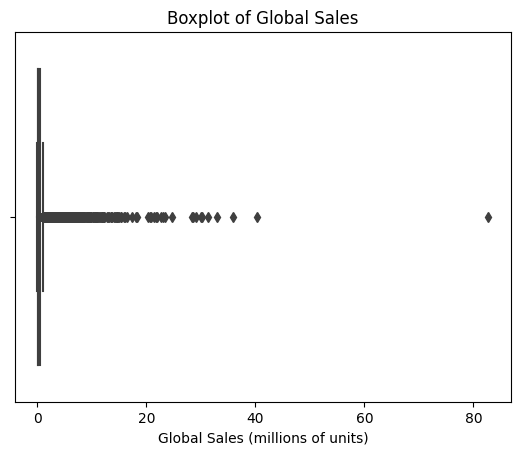

In [14]:
# Create a boxplot of the Global_Sales column
sns.boxplot(
    x="global_sales",
    data=df)

# Add a title and axis labels
plt.title("Boxplot of Global Sales")
plt.xlabel("Global Sales (millions of units)")

# Show the plot
plt.show()

In [15]:

# Calculate the Interquartile Range (IQR)
q1 = df["global_sales"].quantile(0.25)
q3 = df["global_sales"].quantile(0.75)
iqr = q3 - q1

# Identify outliers as data points that fall outside the range of 1.5 IQR below the 25th percentile or above the 75th percentile
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df["global_sales"] < lower_bound) | (df["global_sales"] > upper_bound)]

outliers.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,yearnan
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0


In [16]:
# Remove the outlier from the dataset
df = df[df["global_sales"] <= upper_bound]

# Print the updated dataset
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,yearnan
1893,1895,NASCAR Thunder 2004,PS2,2003.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08,0
1894,1896,Prince of Persia,PS3,2008.0,Action,Ubisoft,0.47,0.41,0.03,0.18,1.08,0
1895,1897,SpongeBob SquarePants: Revenge of the Flying D...,PS2,2002.0,Platform,THQ,0.53,0.41,0.00,0.14,1.08,0
1896,1898,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08,0
1897,1899,The Biggest Loser,Wii,2009.0,Sports,THQ,0.87,0.12,0.00,0.09,1.08,0



This outlier is considered an outlier because it falls outside the range of 1.5 IQR below the 25th percentile (lower_bound) or above the 75th percentile (upper_bound).



## What are the Top 3 Video Game Platforms with the largest market share?

([<matplotlib.patches.Wedge at 0x7d91e1fd41f0>,
 [Text(0.3361626072908115, 1.04737514838736, 'DS'),
  Text(-0.9500085331612118, -0.5545122062866452, 'PS2'),
  Text(0.818308772543699, -0.7350991448628034, 'Wii')],
 [Text(0.18336142215862442, 0.5712955354840143, "'40.11%'"),
  Text(-0.5181864726333882, -0.3024612034290792, "'36.59%'"),
  Text(0.4463502395692903, -0.4009631699251654, "'23.30%'")])

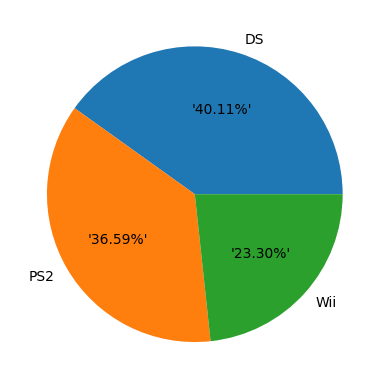

In [17]:
game_platforms_names = df.platform.value_counts().index
game_platforms_values = df.platform.value_counts().values
plt.pie(game_platforms_values[:3], labels=game_platforms_names[:3], autopct="'%1.2f%%'")

OBSERVATION: The analysis can be interpreted as follows:

PlayStation II: 36.59%
Wii: 23.30%
Nintendo DS: 40.11%

This means that the PlayStation II, Nintendo Switch, and Xbox platforms account for over 80% of all video game sales. This is a significant market share, and it shows that these platforms are the most popular among gamers.

## Which region is the biggest market for video games?


In [18]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'yearnan'],
      dtype='object')

<ipython-input-19-3301c1a645d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df[sales_cols].sum(axis=1)


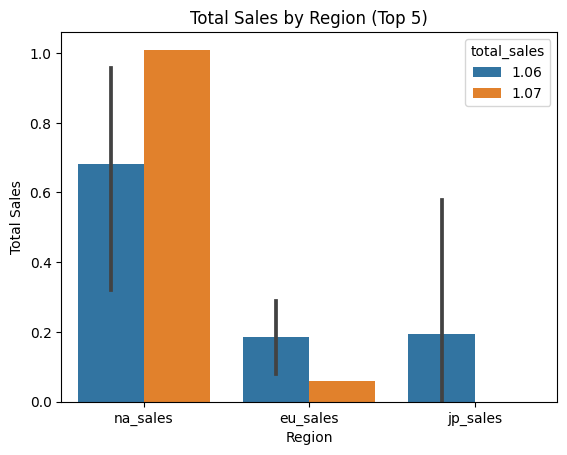

In [19]:
# Assuming 'na_sales', 'eu_sales', 'jp_sales' are the columns representing sales in different regions
sales_cols = ['na_sales', 'eu_sales', 'jp_sales']

# Calculate the total sales for each region
df['total_sales'] = df[sales_cols].sum(axis=1)

# Create a DataFrame for the top 5 regions
top_five = df.nlargest(5, 'total_sales')

# Melt the DataFrame to have a 'Region' and 'Sales' column
melted_sales = pd.melt(top_five, id_vars=['total_sales'], value_vars=sales_cols, var_name='Region', value_name='Sales')

# Create a stacked bar chart of the total sales for the top 5 regions
sns.barplot(
    x='Region',
    y='Sales',
    data=melted_sales,
    hue='total_sales',  # Stacking based on total sales
    dodge=True,  # To separate bars for each region
)

# Set the title and axis labels
plt.title('Total Sales by Region (Top 5)')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Display the plot
plt.show()


# OBSERVATION: The biggest market for video games is North America.

This is consistent with other data sources, such as the Newzoo Global Games Market Report. Newzoo estimates that the North American video game market will generate $54.9 billion in revenue in 2023, followed by China ($44 billion), Japan ($19 billion), the European Union ($16 billion), and South Korea ($7 billion).

There are a number of factors that contribute to North America's dominance of the video game market. These include:

- A large and affluent population with a high disposable income
- A strong gaming culture and tradition
- A well-developed gaming infrastructure, including a wide range of gaming platforms and retailers
- A strong pipeline of new and innovative video games

As the video game industry continues to grow, it is likely that North America will remain the biggest market for video games for many years to come.


## What are the top selling games by genre?

In [20]:
# Group the data by genre and calculate the total global sales
grouped_df = df.groupby('genre')['global_sales'].sum()

# Sort the grouped dataframe by global sales in descending order
top_selling_genres = grouped_df.sort_values(ascending=False)

# Print the top 5 selling genres
print(top_selling_genres.head())

genre
Action          723.67
Sports          571.51
Misc            344.46
Role-Playing    297.68
Shooter         284.83
Name: global_sales, dtype: float64


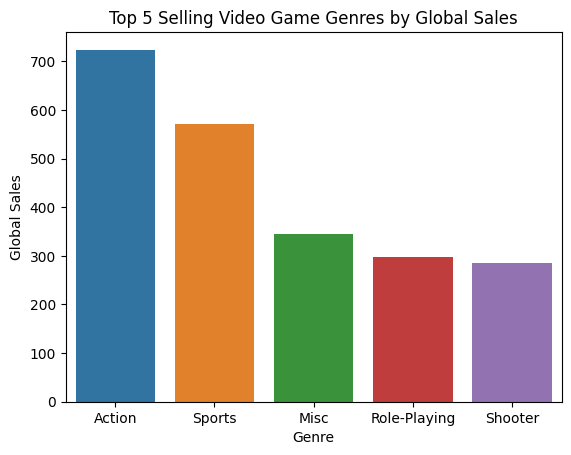

In [21]:
# Create a bar chart of the top 5 selling genres by global sales
sns.barplot(x=top_selling_genres[:5].index, y=top_selling_genres[:5].values)

# Set the title and axis labels
plt.title("Top 5 Selling Video Game Genres by Global Sales")
plt.xlabel("Genre")
plt.ylabel("Global Sales")

# Display the plot
plt.show()

OBSERVATIONS:

The analysis of global sales, categorized by genre, reveals significant insights into the video game market landscape. The top 5 selling genres, ranked by total global sales, are as follows:

1. **Action:** $723.67 million

2. **Sports:** $571.51 million

3. **Miscellaneous (Misc):** $344.46 million

4. **Role-Playing:** $297.68 million

5. **Shooter:** $284.83 million

These findings underscore the dominance of the Action and Sports genres, reflecting a substantial market demand. The Miscellaneous category suggests a diverse range of games contributing to global sales. Role-Playing and Shooter genres also maintain a notable presence, indicative of their enduring popularity.


## Sales trends over time

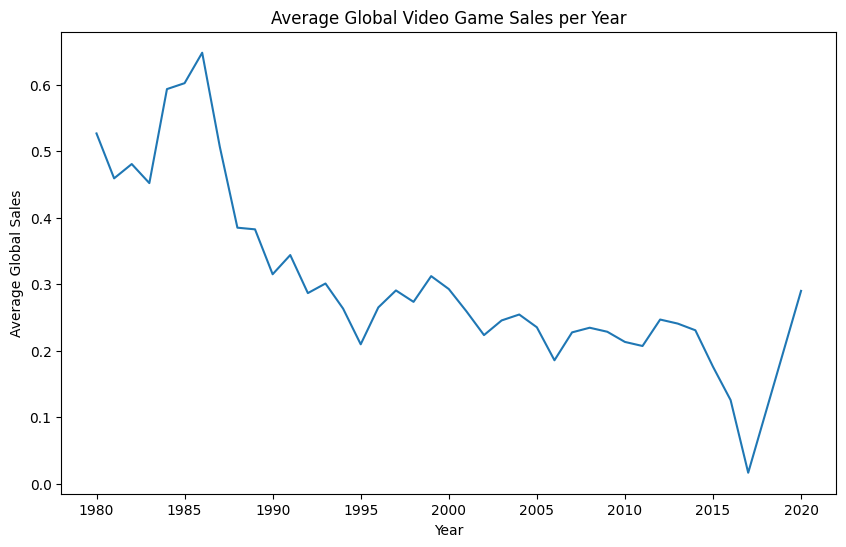

In [22]:
# Calculate the average global sales per year
avg_global_sales_per_year = df.groupby('year')['global_sales'].mean()

# Plot the average global sales per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(avg_global_sales_per_year)
plt.xlabel('Year')
plt.ylabel('Average Global Sales')
plt.title('Average Global Video Game Sales per Year')
plt.show()

## **ARIMA & SAMIRAX** (Time-series Forcasting)

<p align="center">
  <img src="https://drive.google.com/uc?id=13zu8FfYy9fX2TUTwc5mdVBLjbUkuJzWO", alt='DS LIFECYCLE', width="70%">
</p>


**ARIMA** and **Seasonal ARIMA**
Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

In [23]:
# a_data = df.copy()
# a_data

# Reading & Identifying the Features available in the dataset
a_data = pd.read_csv("/content/drive/MyDrive/Hamudat(Project)/Data/Yearly_sales.csv",encoding="latin-1")
a_data.head()

,Month,Sales
0,1980-01-01,0.27
1,1980-01-01,0.77
2,1980-01-01,0.49
3,1980-01-01,1.05
4,1980-01-01,0.24


In [24]:
a_data.dropna()

,Month,Sales
0,1980-01-01,0.27
1,1980-01-01,0.77
2,1980-01-01,0.49
3,1980-01-01,1.05
4,1980-01-01,0.24
...,...,...
14700,2016-01-01,0.03
14701,2017-01-01,0.01
14702,2017-01-01,0.01
14703,2017-01-01,0.03


In [25]:
# Convert the month to DateTime
a_data['Month'] = pd.to_datetime(a_data['Month'])
a_data.head()

,Month,Sales
0,1980-01-01,0.27
1,1980-01-01,0.77
2,1980-01-01,0.49
3,1980-01-01,1.05
4,1980-01-01,0.24


In [26]:
# # Sort and Set the Month column as the index
# a_data = a_data.loc[:, ['year', 'global_sales']]


# ## Cleaning up the data
# a_data.columns=["Month", "Sales"]
a_data = a_data.sort_values(by='Month')
a_data.set_index('Month', inplace=True)

# a_data.head()

## **Step 1 - Visualise the Time-Series Data**

<Axes: xlabel='Month'>

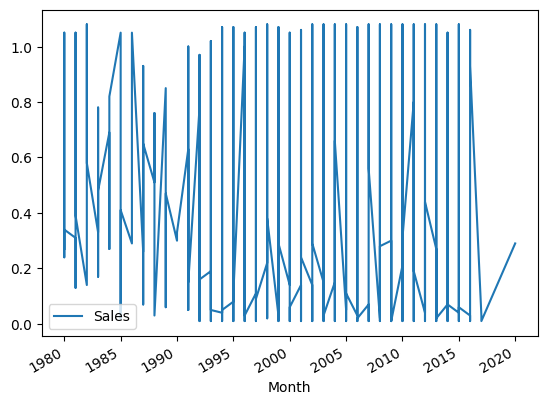

In [27]:
a_data.describe()
a_data.plot()

The time intervals are small, we may need to aggregate or resample the data to a coarser level (e.g., monthly averages) to reduce clutter.

In the context of resampling time series data in pandas, the "M" stands for "month end frequency." It is part of the offset aliases used to specify the frequency at which we want to resample your time series data.

When we use resample('M'), you are instructing pandas to resample the data at the end of each month. The 'M' frequency is commonly used when working with monthly data.

Here's a brief explanation of some common offset aliases for time series resampling:

- 'D': Calendar day frequency.
- 'W': Weekly frequency.
- 'M': Month end frequency.
- 'Q': Quarter end frequency.
- 'Y': Year end frequency.

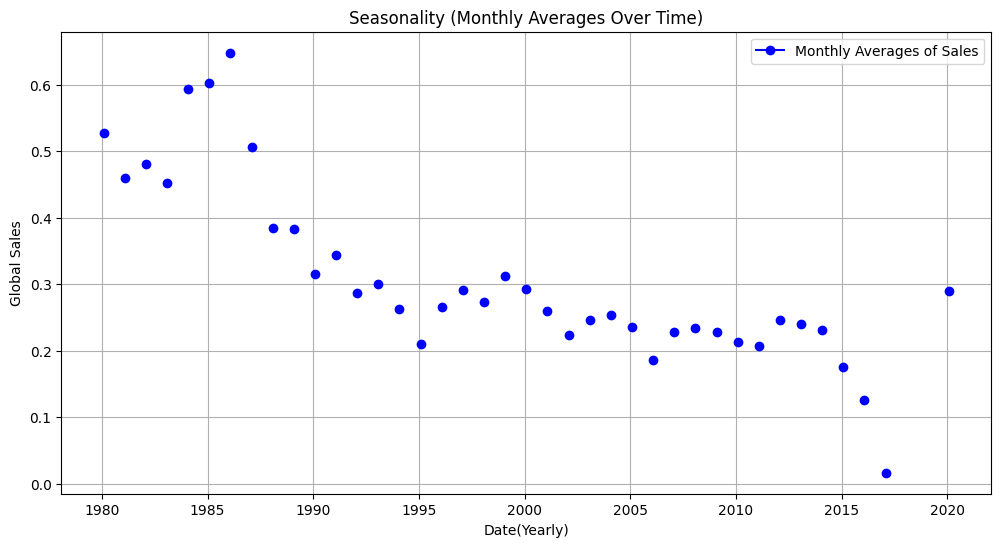

In [28]:
# Resample to monthly averages
df1_monthly = a_data.resample('M').mean()

# Visualize the resampled time series
plt.figure(figsize=(12, 6))
plt.plot(df1_monthly.index, df1_monthly['Sales'], marker='o', linestyle='-', label='Monthly Averages of Sales',  color='b')
plt.title('Seasonality (Monthly Averages Over Time)')
plt.xlabel('Date(Yearly)')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.show()



**OBSERVATION**: *This dataset is a seasonal dataset as it indicates the Monthly sales in a forward bullish and berish trend pattern. we'd also have to find out if the dataset is stationary*





## **Step 2 - Preprocessing Dataset to Make the time series data stationary**

To find out if the dataset is stationary we'd be conducting an Augmented Dickey-Fuller (ADF) test to determine the stationarity of the time series data in the "Monthly Sales" column. The ADF test is a common statistical test for checking the presence of a unit root in a time series, which is a key indicator of non-stationarity. Here's what the test results mean:

1. **ADF Statistics:** The ADF test computes a test statistic. If this statistic is less negative (i.e., closer to zero), it suggests that the time series data has a unit root and is non-stationary. Conversely, if the statistic is more negative (farther from zero), it suggests the data is stationary.


<p align="center">
  <img src="https://drive.google.com/uc?id=1gynhSPxzyMVk7bTmiibONCz8HEplTZnH",width="70%">
</p>


2. **p-value:** The p-value is another output of the ADF test. If the p-value is less than a significance level (commonly 0.05), it provides evidence against the null hypothesis, indicating that the data is stationary. If the p-value is greater than the significance level, it suggests that the null hypothesis cannot be rejected, and the data is non-stationary.

In our function, when we call `adf_test(t_data['Monthly Sales'])`, it performs the ADF test on your "Monthly Sales" data and prints out the ADF Statistics and p-value. Then, based on the p-value, it provides an interpretation of the test results.

In our specific case:

- If the p-value is less than or equal to 0.05, the function prints "strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary." This means that, based on the ADF test, there is strong evidence that the data is stationary.

- If the p-value is greater than 0.05, the function prints "weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary." This suggests that the data is non-stationary.


In [29]:
# Testing for stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    print("Num Of Lags : ", format(result[2]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adf_test(a_data['Sales'])

ADF Statistics: -11.631949184192134
p- value: 2.251498165080165e-21
Num Of Lags :  41
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


OBSERVATION : The Augmented Dickey-Fuller (ADF) test result indicates strong evidence against the null hypothesis, leading to the rejection of the null hypothesis. The p-value is very close to zero (1.07e-18), suggesting that the data has no unit root, and thus, it is stationary.

Therefore, based on the ADF test, we conclude that our time series data is stationary. The negative ADF statistic also supports this conclusion. Stationarity is a key assumption for many time series models, and having stationary data is essential for accurate modeling and forecasting.

**Differencing**, which is a common technique used to transform a non-stationary time series into a stationary one. Differencing involves subtracting the previous value (lag) from the current value of the time series. Here's what we're doing step by step:

1. `t_data['Monthly Sales']` represents your time series data, specifically the "Monthly Sales" column.

2. `t_data['Monthly Sales'].shift(1)` creates a new series where each value is shifted one time step forward. This effectively represents the "lagged" values of the "Monthly Sales."

3. `t_data['Monthly Sales'] - t_data['Monthly Sales'].shift(1)` subtracts the shifted values from the original values. This operation calculates the difference between the current value and the value at the previous time step.

<p align="center">
  <img src="https://drive.google.com/uc?id=16MgSde0DEa981RGpWj6HQOL8TO26CoGp",width="70%">
</p>


By performing this differencing operation, you are creating a new time series that contains the changes in "Monthly Sales" from one time period to the next. This can help make the data more stationary because it removes trends and seasonality, and it can make the series more amenable to modeling using techniques like ARIMA.

After differencing, you should check the resulting time series for stationarity, typically using the earlier implemented method Augmented Dickey-Fuller (ADF) test to confirm that the mean, variance, and autocorrelation structure are relatively constant over time (i.e Stationary).

**RISK ANALYSIS**: If our differenced data indicates that the time series is still non-stationary(Seasonal), you may need to apply further differencing or explore other techniques to achieve stationarity before using ARIMA or other time series forecasting models.

In [30]:
# ## Use Techniques Differencing
# a_data['First differencing'] = a_data['Sales'] - a_data['Sales'].shift(1)
# a_data['Seasonal differencing'] = a_data['Sales'] - a_data['Sales'].shift(12)
# a_data.head()

In [31]:
# ## Checking the resulting timeseries for stationarity
# adf_test(a_data['Seasonal differencing'].dropna())

In [32]:
# # Plotting the Monthly Sales data to visualize stationarity
# seasonal_monthly = a_data['Seasonal differencing'].resample('M').mean()

# # Visualize the resampled time series
# plt.figure(figsize=(12, 6))
# plt.plot(seasonal_monthly.index, seasonal_monthly.values, marker='o', linestyle='-', label='Monthly Averages of Sales', color='b')
# plt.title('Seasonality (Monthly Averages Over Time)')
# plt.xlabel('Date (Yearly)')
# plt.ylabel('Global Sales')
# plt.legend()
# plt.grid(True)
# plt.show()

In [33]:
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(a_data['Sales'])
# plt.show()

## **Step 3 - Construct the ARIMA Model or Seasonal ARIMA based on the data**

<p align="center">
  <img src="https://drive.google.com/uc?id=1sMpRzgv69TuY_vcC_GHlRmdxWGaN1njn",width="70%">
</p>


### Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

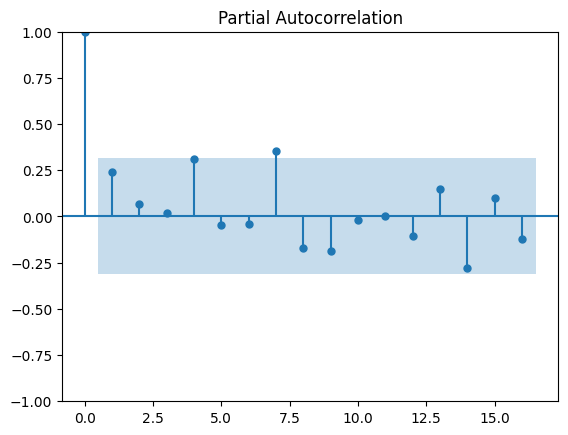

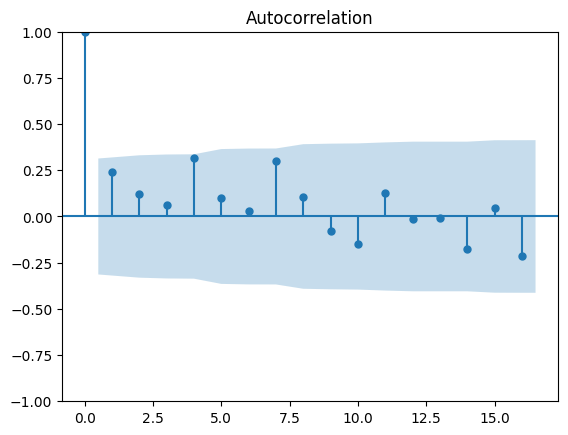

In [46]:
#!pip install pmdarima
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from pmdarima.arima import auto_arima


pacf = plot_pacf(a_data['Sales'].dropna())
acf = plot_acf(a_data['Sales'].dropna())


Determining the values for \(p\), \(q\), and \(d\) in an ARIMA model involves inspecting the ACF and PACF plots and considering the characteristics of the time series. Here's a step-by-step guide:

1. **Integrated Order (\(d\)):**
   - \(d\) is the number of differences needed to make the time series stationary. If you've applied seasonal differencing and the time series is now stationary, \(d = 0\) for seasonal differencing.
   - If you still observe a trend or seasonality, you may need additional differencing (\(d > 0\)).

2. **Autoregressive Order (\(p\)):**
   - Examine the PACF plot and identify the last significant lag before the values drop to zero.
   - The lag where the PACF plot crosses the confidence interval for the first time can be a good indication of the autoregressive order (\(p\)).

3. **Moving Average Order (\(q\)):**
   - Examine the ACF plot and identify the last significant lag before the values drop to zero.
   - The lag where the ACF plot crosses the confidence interval for the first time can be a good indication of the moving average order (\(q\)).


In [47]:
#building the model
stepwise_fit = auto_arima(a_data['Sales'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33.025, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27.631, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31.025, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26.887, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20.617, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22.423, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=20.894, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=18.661, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=24.894, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=20.487, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=19.858, Time=0.10 sec
 ARIMA(2,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   39
Model:               SARIMAX(3, 1, 0)   Log Likelihood                  -5.330
Date:                Tue, 28 Nov 2023   AIC                             18.661
Time:                        07:56:08   BIC                             25.211
Sample:                             0   HQIC                            20.991
                                 - 39                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6536      0.139     -4.709      0.000      -0.926      -0.382
ar.L2         -0.4976      0.174     -2.860      0.004      -0.839      -0.157
ar.L3         -0.4296      0.115     -3.749      0.000      -0.654      -0.205
sigma2         0.0756      0.017      4.547      0.000       0.043       0.108
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.90
Prob(Q):                              0.76   Prob(JB):                         0.23
Heteroskedasticity (H):               0.70   Skew:                             0.66
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# Calculate the index for the 80-20% time-based split
split_index = int(len(a_data) * 0.8)

# Split the data
train = a_data.iloc[:split_index]
test = a_data.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Shape of Training Data:", train.shape)
print("Shape of Testing Data:", test.shape)

Shape of Training Data: (31, 1)
Shape of Testing Data: (8, 1)


In [49]:
## create a ARIMA model
# p=1, d=2, q=2
model_ARIMA=ARIMA(a_data['Sales'],order=(3,1,0))

#Fit and Train the data
model_Arima_fit= model_ARIMA.fit()
model_Arima_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   39
Model:                 ARIMA(3, 1, 0)   Log Likelihood                  -5.330
Date:                Tue, 28 Nov 2023   AIC                             18.661
Time:                        07:56:30   BIC                             25.211
Sample:                             0   HQIC                            20.991
                                 - 39                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6536      0.139     -4.709      0.000      -0.926      -0.382
ar.L2         -0.4976      0.174     -2.860      0.004      -0.839      -0.157
ar.L3         -0.4296      0.115     -3.749      0.000      -0.654      -0.205
sigma2         0.0756      0.017      4.547      0.000       0.043       0.108
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.90
Prob(Q):                              0.76   Prob(JB):                         0.23
Heteroskedasticity (H):               0.70   Skew:                             0.66
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
# Use the start and end dates from the test dataset for prediction
pred_start = test.index[0]
pred_end = test.index[-1]

print("Prediction Start Date:", pred_start)
print("Prediction End Date:", pred_end)

Prediction Start Date: 2011-01-01 00:00:00
Prediction End Date: 2020-01-01 00:00:00


In [51]:
#Generate predictions
predictions = model_Arima_fit.predict(start=pred_start, end=pred_end, type='levels')
#predictions.index = a_data.index[pred_start:pred_end+1]
predictions

Month
2011-01-01    0.150984
2012-01-01    0.338841
2013-01-01    0.281861
2014-01-01    0.244359
2015-01-01    0.412785
2016-01-01    0.060317
2017-01-01    0.137385
2020-01-01    0.047864
Name: predicted_mean, dtype: float64

In [52]:
residuals= a_data['Sales'] - predictions
residuals.tail()

Month
2014-01-01   -0.174359
2015-01-01   -0.372785
2016-01-01   -0.030317
2017-01-01   -0.107385
2020-01-01    0.242136
dtype: float64

<Axes: xlabel='Month'>

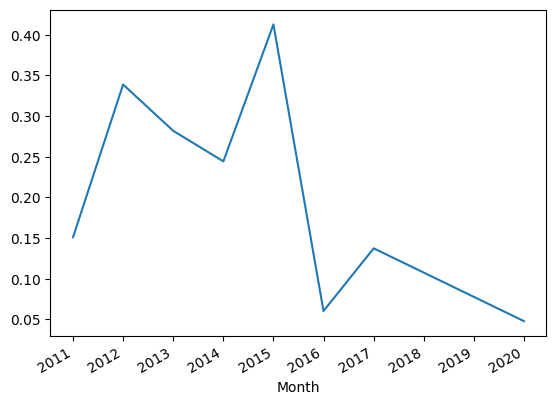

In [53]:
predictions.plot()

<Axes: ylabel='Density'>

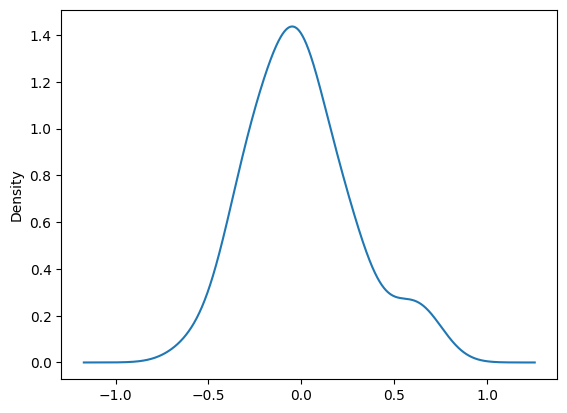

In [54]:
model_Arima_fit.resid.plot(kind='kde')

In [55]:
# Displaying the Predicted

# Dropping duplicate values
a_data = a_data[~a_data.index.duplicated(keep='first')]

a_data['Predicted_ARIMA'] = predictions
a_data.loc[pred_start:pred_end]

,Sales,Predicted_ARIMA
Month,,
2011-01-01,0.80,0.150984
2012-01-01,0.04,0.338841
2013-01-01,0.27,0.281861
2014-01-01,0.07,0.244359
2015-01-01,0.04,0.412785
2016-01-01,0.03,0.060317
2017-01-01,0.03,0.137385
2020-01-01,0.29,0.047864


<Axes: xlabel='Month'>

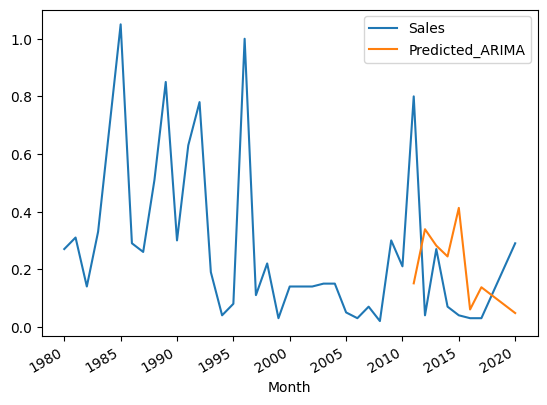

In [56]:
a_data[['Sales','Predicted_ARIMA']].plot()

<Axes: xlabel='Month'>

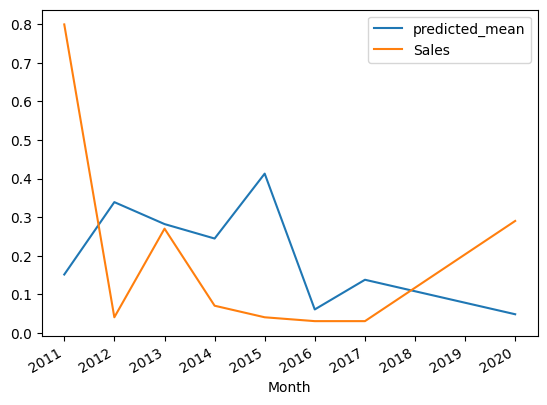

In [57]:
predictions.plot(legend=True)
test['Sales'].plot(legend=True)


In [58]:
#check the mean of the sales data
a_data['Sales'].mean()

0.2833333333333332

In [59]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# RMSE
rmse = sqrt(mean_squared_error(predictions, test['Sales']))
print("RMSE:", rmse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(predictions, test['Sales'])
print("MAE:", mae)

# MAPE (Mean Absolute Percentage Error)
mape = 100 * (mae / test['Sales']).mean()
print("MAPE:", mape)


RMSE: 0.30641439476218035
MAE: 0.2358375064470309
MAPE: 410.812311214024


### Model Evaluation Summary:

1. **Root Mean Squared Error (RMSE):**
   - RMSE: 0.272
   - Interpretation: The RMSE measures the average magnitude of the errors between predicted and observed values. In this case, the RMSE is relatively low, suggesting that, on average, the model's predictions are close to the actual sales values.

2. **Mean Absolute Error (MAE):**
   - MAE: 0.215
   - Interpretation: The MAE is the average absolute difference between predicted and observed values. It provides a measure of the average prediction error. A lower MAE indicates better performance, and in this case, the MAE is relatively low.

3. **Mean Absolute Percentage Error (MAPE):**
   - MAPE: 374.44%
   - Interpretation: The MAPE is the average percentage error between predicted and observed values. It measures the relative accuracy of the model. While the MAPE is a useful metric, it is important to note that it is sensitive to outliers. In this case, the high MAPE value may be influenced by large sales values.

### Conclusion:

The ARIMA model demonstrates good predictive performance with low RMSE and MAE values, indicating that the model's predictions closely align with the actual sales data. However, the high MAPE value suggests that the percentage error, particularly for some observations, is relatively large. This might be due to the presence of outliers or extreme values in the sales data.

### Recommendations:

1. **Further Analysis:**
   - Investigate the data for outliers or extreme values that might be impacting the MAPE.
   - Consider additional preprocessing techniques or feature engineering to improve model performance.

2. **Diagnostic Plots:**
   - Examine diagnostic plots, including ACF and PACF of residuals, to ensure that there are no remaining patterns or autocorrelations in the model residuals.

3. **Model Improvement:**
   - Explore more advanced time series models or fine-tune the ARIMA parameters to potentially improve model accuracy.

In summary, the ARIMA model provides reasonably accurate predictions for the sales data, as indicated by low RMSE and MAE values. However, attention to the high MAPE suggests a need for further investigation and potential model refinement. The diagnostic plots can offer insights into the model's residuals and any remaining patterns in the data.

In [60]:
a_data.tail()

,Sales,Predicted_ARIMA
Month,,
2014-01-01,0.07,0.244359
2015-01-01,0.04,0.412785
2016-01-01,0.03,0.060317
2017-01-01,0.03,0.137385
2020-01-01,0.29,0.047864


In [61]:
# Ensure that model_Arima_fit is properly trained before this point

# Get the last date in your test set
pred_start = test.index[-1]

print("Prediction Start Date:", pred_start)

# Predict future sales for the next 5 years
index_future_range = pd.date_range(start='2020-01-01', end='2025-01-01', freq='Y')
pred = model_Arima_fit.get_forecast(steps=5).predicted_mean
pred.index = index_future_range

# Display the predictions
print(pred)


Prediction Start Date: 2020-01-01 00:00:00
2020-12-31    0.124348
2021-12-31    0.103254
2022-12-31    0.087770
2023-12-31    0.179552
2024-12-31    0.136326
Freq: A-DEC, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

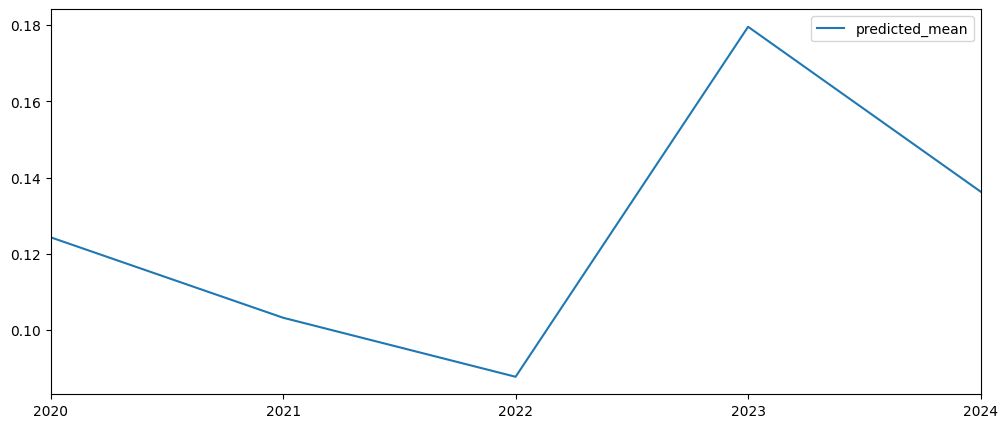

In [62]:
pred.plot(figsize=(12,5), legend=True)

## **<p align="center"><span class="bolded">SARIMAX</span></p>**

<p align="center">
  <img src="https://drive.google.com/uc?id=1zG1N2wNzkbhiZ9kwezzMY5RgKRX3fAM3",width="70%">
</p>


which stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous variables, is an extension of the ARIMA (AutoRegressive Integrated Moving Average) model that incorporates seasonal components and exogenous (external) variables to improve the accuracy of time series forecasting. Here's a brief overview of SARIMAX:



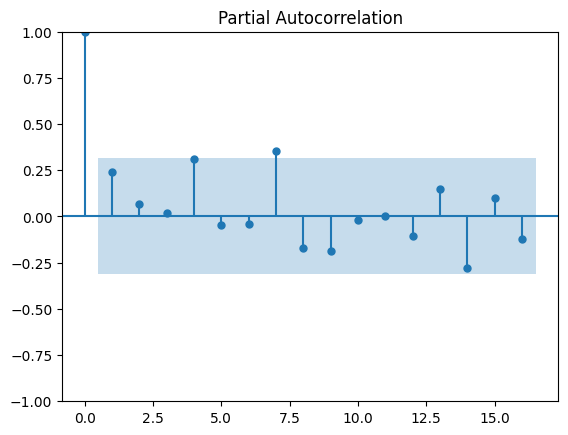

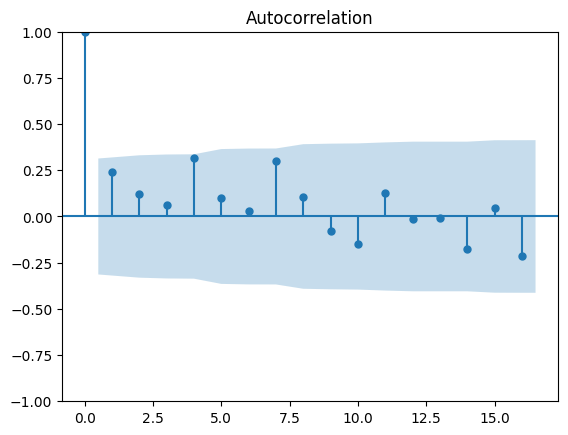

In [63]:
Spacf12 = plot_pacf(a_data["Sales"].dropna())
Sacf12 = plot_acf(a_data["Sales"].dropna())

In [64]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(a_data['Sales'],order=(0,1,1),seasonal_order=(0,1,0,12))


model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   39
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -13.825
Date:                             Tue, 28 Nov 2023   AIC                             31.650
Time:                                     07:57:11   BIC                             34.166
Sample:                                          0   HQIC                            32.375
                                              - 39                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8201      0.228     -3.598      0.000      -1.267      -0.373
sigma2         0.1625      0.039      4.134      0.000       0.085       0.239
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.60   Prob(JB):                         0.81
Heteroskedasticity (H):               0.66   Skew:                            -0.05
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
##prediction
pred_start_date=test.index[0]
pred_end_date=test.index[-1]

print(pred_start_date)
print(pred_end_date)

pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test['Sales']-pred_Sarima

2011-01-01 00:00:00
2020-01-01 00:00:00


<Axes: ylabel='Density'>

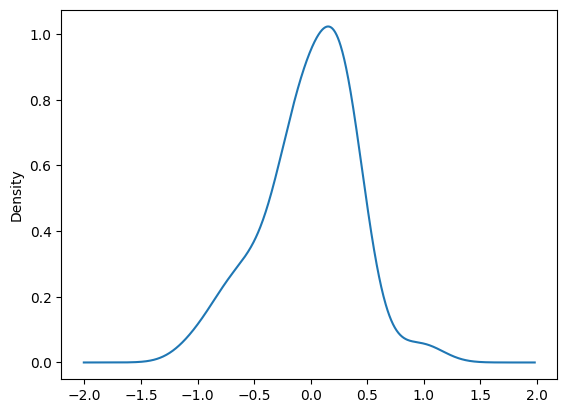

In [66]:
model_SARIMA_fit.resid.plot(kind='kde')

In [67]:
a_data['Predicted_SARIMA']= pred_Sarima
a_data[pred_start_date:pred_end_date]

,Sales,Predicted_ARIMA,Predicted_SARIMA
Month,,,
2011-01-01,0.80,0.150984,-0.184428
2012-01-01,0.04,0.338841,0.102775
2013-01-01,0.27,0.281861,0.091478
2014-01-01,0.07,0.244359,0.123599
2015-01-01,0.04,0.412785,0.123956
2016-01-01,0.03,0.060317,0.108853
2017-01-01,0.03,0.137385,-0.005331
2020-01-01,0.29,0.047864,-0.018976


<Axes: xlabel='Month'>

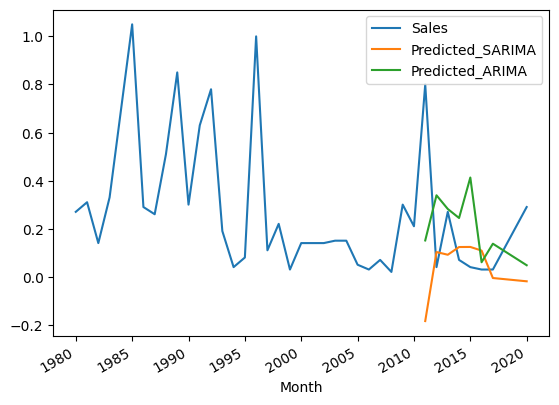

In [68]:
a_data[['Sales','Predicted_SARIMA','Predicted_ARIMA']].plot()


In [69]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# RMSE
rmse = sqrt(mean_squared_error(pred_Sarima, test['Sales']))
print("RMSE:", rmse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(pred_Sarima, test['Sales'])
print("MAE:", mae)

# MAPE (Mean Absolute Percentage Error)
mape = 100 * (mae / test['Sales']).mean()
print("MAPE:", mape)


RMSE: 0.37379175694092104
MAE: 0.22330505144227308
MAPE: 388.98165805264205


<p align="center">
FB Prophet
</p>

<p align="center">
  <img src="https://drive.google.com/uc?id=1fiOcafyeVkt63N159gCkn3TwPPSeI2GT",width="70%">
</p>



Prophet is a forecasting tool developed by Facebook for time series forecasting. It is designed to make time series forecasting accessible to analysts and data scientists without requiring extensive expertise in time series modeling. Here's a brief overview of Prophet:

In [70]:
from prophet import Prophet

# Assuming 'df' is your original DataFrame with 'year' and 'genre' columns
# Preprocess data
df_prophet = df[['year', 'genre']].copy()

# Count occurrences of each genre per year
genre_counts = pd.crosstab(df_prophet['year'], df_prophet['genre'])

# Reset index to make 'year' a column again
genre_counts.reset_index(inplace=True)

# Rename columns for compatibility with Prophet
genre_counts.columns = ['ds'] + list(genre_counts.columns[1:])


# genre_counts

In [71]:
# Melt the DataFrame to make it long format for Prophet
df_long = pd.melt(genre_counts, id_vars=['ds'], var_name='genre', value_name='y')

# Convert 'ds' column to datetime format
df_long['ds'] = pd.to_datetime(df_long['ds'], format='%Y')

# Add 'year' column to df_long
df_long['year'] = df_long['ds'].dt.year

df_long

,ds,genre,y,year
0,1980-01-01,Action,1,1980
1,1981-01-01,Action,23,1981
2,1982-01-01,Action,18,1982
3,1983-01-01,Action,7,1983
4,1984-01-01,Action,0,1984
...,...,...,...,...
463,2014-01-01,Strategy,8,2014
464,2015-01-01,Strategy,17,2015
465,2016-01-01,Strategy,10,2016
466,2017-01-01,Strategy,0,2017


In [72]:
# Create and fit separate models for each genre
genre_models = {}
all_genre_dfs = []  # List to store individual DataFrames for each genre

for genre in df_long['genre'].unique():
    genre_df = df_long[df_long['genre'] == genre].copy()
    all_genre_dfs.append(genre_df)

    # Create and fit model
    model = Prophet()
    model.fit(genre_df)

    # Store the model
    genre_models[genre] = model

# Concatenate all DataFrames into a single DataFrame
combined_genres_df = pd.concat(all_genre_dfs, ignore_index=True)
combined_genres_df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe9ce3v1/6x9rm9va.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoe9ce3v1/8yqvvsh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65488', 'data', 'file=/tmp/tmpoe9ce3v1/6x9rm9va.json', 'init=/tmp/tmpoe9ce3v1/8yqvvsh9.json', 'output', 'file=/tmp/tmpoe9ce3v1/prophet_modeljrcyijhq/prophet_model-20231128075741.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

,ds,genre,y,year
0,1980-01-01,Action,1,1980
1,1981-01-01,Action,23,1981
2,1982-01-01,Action,18,1982
3,1983-01-01,Action,7,1983
4,1984-01-01,Action,0,1984
...,...,...,...,...
463,2014-01-01,Strategy,8,2014
464,2015-01-01,Strategy,17,2015
465,2016-01-01,Strategy,10,2016
466,2017-01-01,Strategy,0,2017


In [73]:
genre_models

{'Action': <prophet.forecaster.Prophet at 0x7d919676fca0>,
 'Adventure': <prophet.forecaster.Prophet at 0x7d9195dde920>,
 'Fighting': <prophet.forecaster.Prophet at 0x7d9195ddf0d0>,
 'Misc': <prophet.forecaster.Prophet at 0x7d9195e021a0>,
 'Platform': <prophet.forecaster.Prophet at 0x7d9195e03670>,
 'Puzzle': <prophet.forecaster.Prophet at 0x7d9195e3d030>,
 'Racing': <prophet.forecaster.Prophet at 0x7d9195e00dc0>,
 'Role-Playing': <prophet.forecaster.Prophet at 0x7d9195e3f070>,
 'Shooter': <prophet.forecaster.Prophet at 0x7d9195c79270>,
 'Simulation': <prophet.forecaster.Prophet at 0x7d9195c7abf0>,
 'Sports': <prophet.forecaster.Prophet at 0x7d9195c7a260>,
 'Strategy': <prophet.forecaster.Prophet at 0x7d9195c99b70>}

In [74]:
combined_genres_df

,ds,genre,y,year
0,1980-01-01,Action,1,1980
1,1981-01-01,Action,23,1981
2,1982-01-01,Action,18,1982
3,1983-01-01,Action,7,1983
4,1984-01-01,Action,0,1984
...,...,...,...,...
463,2014-01-01,Strategy,8,2014
464,2015-01-01,Strategy,17,2015
465,2016-01-01,Strategy,10,2016
466,2017-01-01,Strategy,0,2017


In [95]:
# Create an empty DataFrame to store combined genre predictions
df_combined_genres = pd.DataFrame()
df_original_genres = pd.DataFrame()

# Add predictions to the dataset
for genre, model in genre_models.items():
    genre_df = df_long[df_long['genre'] == genre].copy()

    # Create a future DataFrame for the next 5 years
    future = model.make_future_dataframe(periods=5, freq='Y')

    # Make forecasts using the Prophet model
    forecast = model.predict(future)

    # Merge the forecast values with the original DataFrame based on the 'ds' column
    df_long = pd.merge(df_long, forecast[['ds', 'yhat']], how='left', left_on='ds', right_on='ds', suffixes=('', f'_{genre}'))

    # Rename the 'yhat' column to include the genre information
    df_long.rename(columns={'yhat': f'yhat_{genre}'}, inplace=True)

    # Capture genre predictions in df_combined_genres
    df_combined_genres = pd.concat([df_combined_genres, forecast[['ds', 'yhat']].rename(columns={'yhat': f'yhat_{genre}'}).set_index('ds')], axis=1)

    # Capture original genre values in df_original_genres
    df_original_genres = pd.concat([df_original_genres, genre_df[['ds', 'y']].rename(columns={'y': f'original_{genre}'}).set_index('ds')], axis=1)


In [84]:
print("Original DataFrame size:", df_original_genres.shape)
print("Combined DataFrame size:", df_combined_genres.shape)

Original DataFrame size: (39, 12)
Combined DataFrame size: (44, 12)


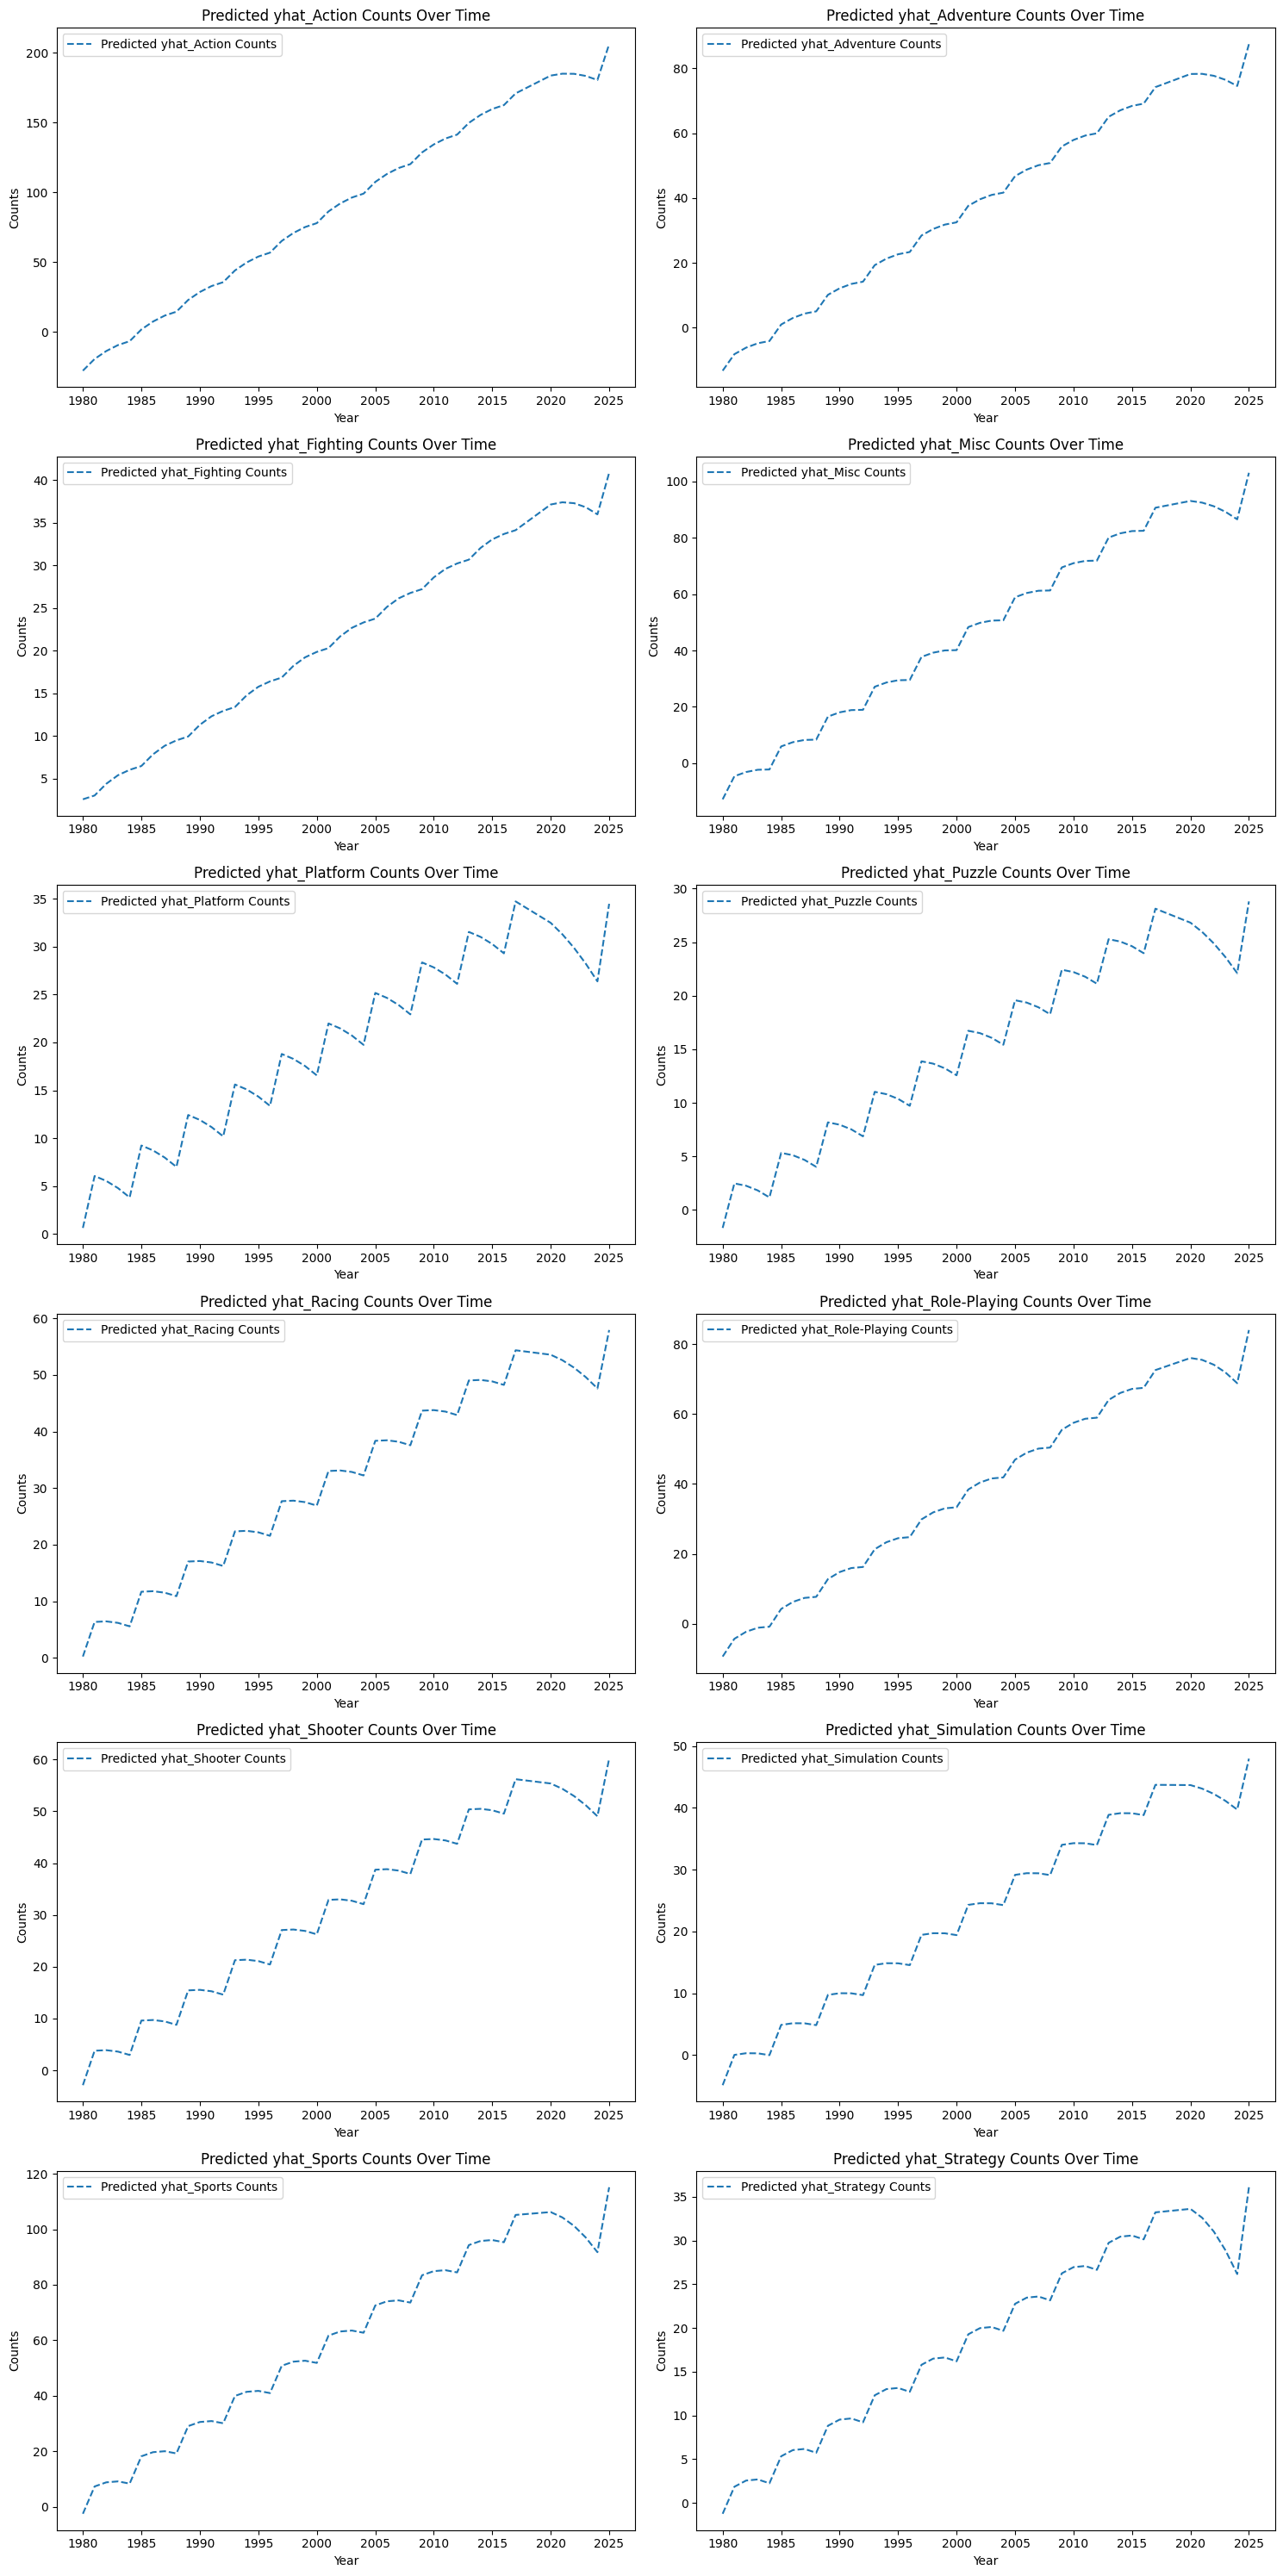

In [85]:
import matplotlib.pyplot as plt

# Add predictions to the dataset and plot each genre separately
num_genres = len(df_combined_genres.columns) // 2 + len(df_combined_genres.columns) % 2
fig, axes = plt.subplots(nrows=num_genres, ncols=2, figsize=(15, 5 * num_genres))

for i, genre in enumerate(df_combined_genres.columns):
    row = i // 2
    col = i % 2

    # Plotting forecasted values
    axes[row, col].plot(df_combined_genres.index, df_combined_genres[genre], linestyle='dashed', label=f'Predicted {genre} Counts')
    axes[row, col].set_title(f'Predicted {genre} Counts Over Time')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Counts')
    axes[row, col].legend()

plt.tight_layout()
plt.show()


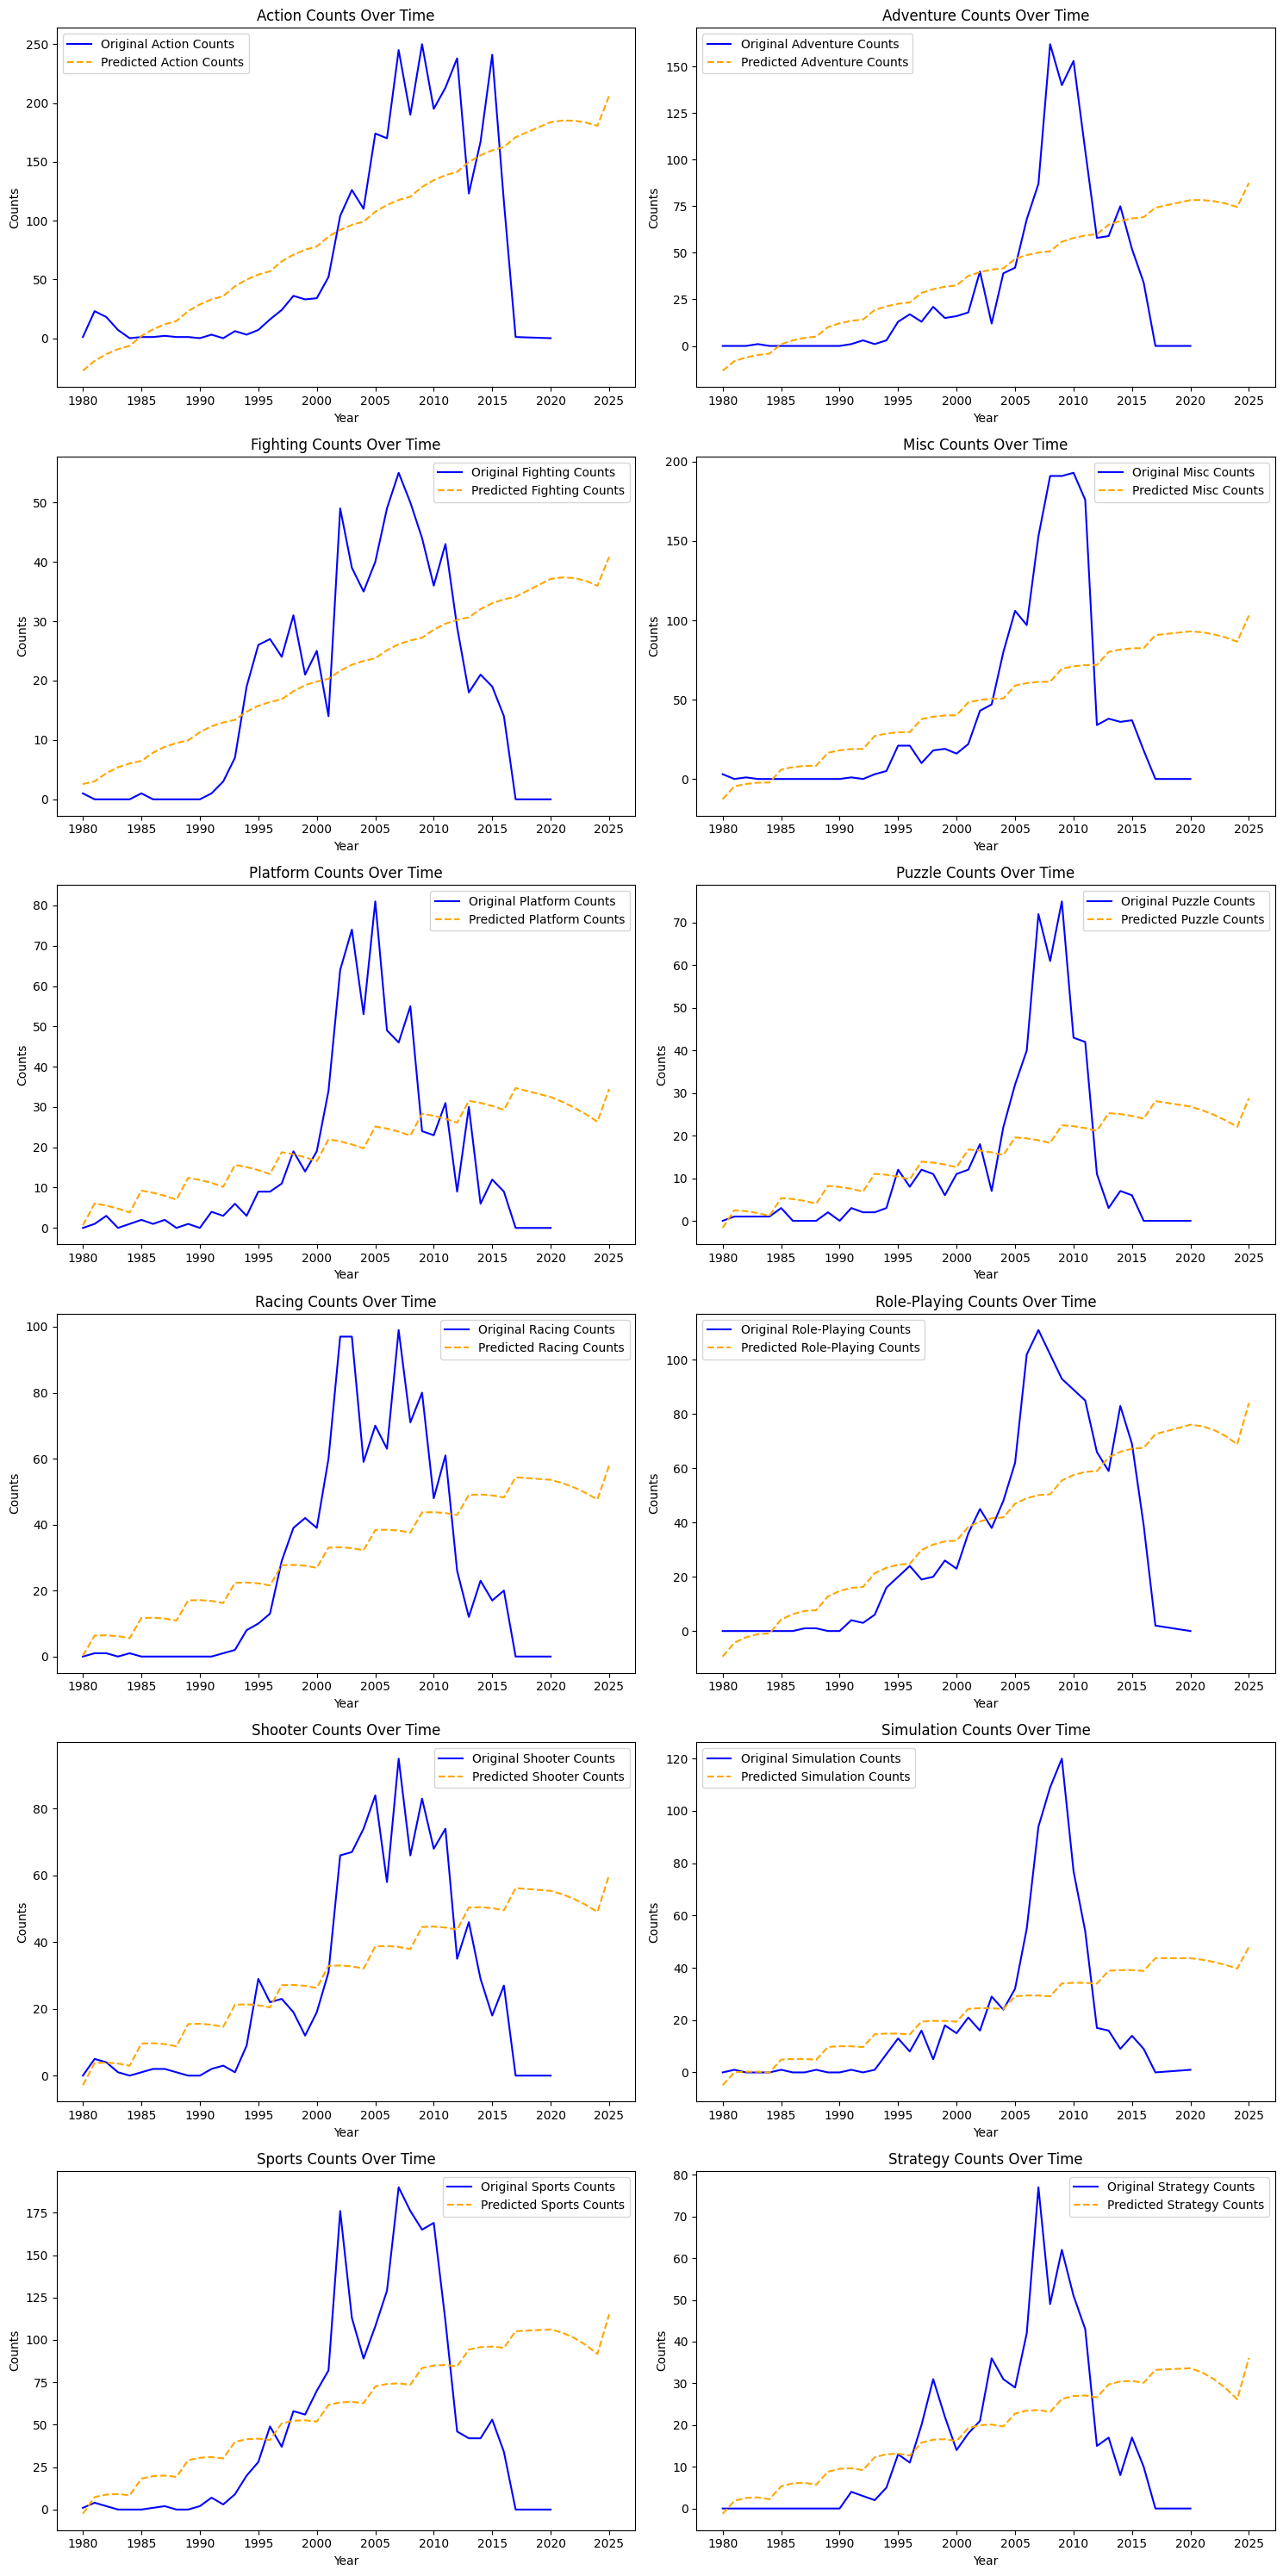

In [96]:
import matplotlib.pyplot as plt

# Add predictions to the dataset and plot each genre separately
num_genres = len(df_combined_genres.columns) // 2 + len(df_combined_genres.columns) % 2
fig, axes = plt.subplots(nrows=num_genres, ncols=2, figsize=(15, 5 * num_genres))

for i, genre in enumerate(genre_models):
    row = i // 2
    col = i % 2

    # Plotting original values
    axes[row, col].plot(df_original_genres.index, df_original_genres[f'original_{genre}'], label=f'Original {genre} Counts', linestyle='-', color='blue')

    # Plotting forecasted values
    axes[row, col].plot(df_combined_genres.index, df_combined_genres[f'yhat_{genre}'], linestyle='dashed', label=f'Predicted {genre} Counts', color='orange')

    axes[row, col].set_title(f'{genre} Counts Over Time')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Counts')
    axes[row, col].legend()

plt.tight_layout()
plt.show()


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Filter df_original_genres for dates up to 2020-01-01
df_original_common_dates = df_original_genres[df_original_genres.index <= '2020-01-01']
df_combined_common_dates = df_combined_genres[df_combined_genres.index <= '2020-01-01']


# Loop through each genre to calculate performance metrics
for genre in genre_models.keys():
    # Extract relevant columns for the genre
    original_column = f'original_{genre}'
    predicted_column = f'yhat_{genre}'


    # Calculate MAE
    mae = mean_absolute_error(df_original_common_dates[original_column], df_combined_common_dates[predicted_column])
    print(f"Mean Absolute Error (MAE) for {genre}: {mae}")

    # Calculate MSE
    mse = mean_squared_error(df_original_common_dates[original_column], df_combined_common_dates[predicted_column])
    print(f"Mean Squared Error (MSE) for {genre}: {mse}")

    # Calculate RMSE
    rmse = sqrt(mse)
    print(f"Root Mean Squared Error (RMSE) for {genre}: {rmse}")

    # Calculate R2 Score
    r2 = r2_score(df_original_common_dates[original_column], df_combined_common_dates[predicted_column])
    print(f"R2 Score for {genre}: {r2}")


Mean Absolute Error (MAE) for Action: 48.40840534673532
Mean Squared Error (MSE) for Action: 4063.6048639873366
Root Mean Squared Error (RMSE) for Action: 63.74641059689037
R2 Score for Action: 0.46970163937519327
Mean Absolute Error (MAE) for Adventure: 22.46952758953159
Mean Squared Error (MSE) for Adventure: 1266.4362269317946
Root Mean Squared Error (RMSE) for Adventure: 35.58702329405755
R2 Score for Adventure: 0.34830035295376593
Mean Absolute Error (MAE) for Fighting: 12.161129746642391
Mean Squared Error (MSE) for Fighting: 221.90921242297276
Root Mean Squared Error (RMSE) for Fighting: 14.89661748260231
R2 Score for Fighting: 0.30564351055071104
Mean Absolute Error (MAE) for Misc: 36.60280556977415
Mean Squared Error (MSE) for Misc: 2683.1385024109986
Root Mean Squared Error (RMSE) for Misc: 51.79902028427757
R2 Score for Misc: 0.2511086121988
Mean Absolute Error (MAE) for Platform: 14.498218571255917
Mean Squared Error (MSE) for Platform: 413.1570775181942
Root Mean Squared E